# Evaluating Various Machine Learning Algorithms on Image Classification of Medical X-Rays 

# Part 1-  Data Collection


The dataset used for this coursework was acquired from three sources online. It contains 11,210 x-ray images distributed amongst four datasets for four body parts - chest, elbow, shoulder and wrist.
Details of each dataset is provided below:

* **Chest:** The chest dataset consists of 3583 images obtained from [Kaggle's Chest X-Ray Image Repository](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia). The samples are mixed i.e both 'normal' and 'pneumonia' samples are used.

* **Elbow & Shoulder:** The elbow and shoulder dataset consist of 3000 and 2073 images respectively, both obtained from [Kaggle's Finger X-Ray Image Repository](https://www.kaggle.com/alexandersuh/finger-xray). This repository contains over 70,000 images in total of several body parts including, but not limited to finger, wrist, elbow, shoulder etc. Thus, both datasets were easily obtained from this repository.

* **Wrist:** The wrist dataset consists of 2554 images. A part of this dataset was obtained from [Mendeleys's Wrist Fracture X-Rays](https://data.mendeley.com/datasets/xbdsnzr8ct/1). The other part was obtained from the [Finger X-ray Images](https://www.kaggle.com/alexandersuh/finger-xray) discussed earlier.

To begin, required libraries are loaded:

In [1]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from skimage import feature
from collections import Counter

The code below loads all images from the specified image repository as greyscale images of equal size. This is then converted to numpy arrays with the pixels and targetnames stored separately. Feature extraction is also done in this stage using the HOG method and stored as a numpy array.

In [2]:
class HOG:
    def __init__(self, orientations = 9, pixelsPerCell = (8, 8),
        cellsPerBlock = (2, 2), transform = False):
        self.orienations = orientations
        self.pixelsPerCell = pixelsPerCell
        self.cellsPerBlock = cellsPerBlock
        self.transform = transform
    def describe(self, image):
        hist = feature.hog(image, orientations = self.orienations,
            pixels_per_cell = self.pixelsPerCell,
            cells_per_block = self.cellsPerBlock,
            transform_sqrt = self.transform)
        return hist
    
hog = HOG(orientations = 18, pixelsPerCell = (10, 10), cellsPerBlock = (1, 1), transform = True)

width = 100
height = 100
path = 'XRAY DATA'
images = [] 
targetnames = [] 
primaryrepo = []
featurerepo =[]

for root, dirs, files in os.walk(path):
     for file in files:
        with open(os.path.join(root, file), "r") as auto:
            try:
                img = cv2.imread(root+'/'+file, 0)
                img = cv2.resize(img, (width, height)) 
                images.append(img)
                primaryrepo.append(img.flatten())
                hist = hog.describe(img)
                featurerepo.append(hist)
                targetnames.append(root.replace(path,'').replace('\\','').replace('/',''))
            except Exception as e:
                print("Cannot import "+file)

primaryrepo = np.array(primaryrepo) 
featurerepo = np.array(featurerepo)



In [3]:
print("Primary Repository:\n", primaryrepo)
print("Size of primary repository: " ,primaryrepo.shape)


Primary Repository:
 [[ 92  74  69 ...  66  48   1]
 [158 113 115 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [ 94  67  66 ...  60  57  65]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
Size of primary repository:  (11210, 10000)


In [4]:
print("HOG Features Repository:\n", featurerepo)
print(" Size of HOG features repository: " ,featurerepo.shape)

HOG Features Repository:
 [[0.33296385 0.33296385 0.3261017  ... 0.3991582  0.49984572 0.49984572]
 [0.35301203 0.08525417 0.24983995 ... 0.         0.         0.        ]
 [0.57735027 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.46876851 0.         0.17241535 ... 0.         0.         0.22930014]
 [0.65726332 0.         0.         ... 0.         0.6342643  0.27092357]
 [0.68688174 0.02671815 0.         ... 0.         0.67125939 0.04155175]]
 Size of HOG features repository:  (11210, 1800)


Class = CHEST, number of samples=3583
Class = ELBOW, number of samples=3000
Class = SHOULDER, number of samples=2073
Class = WRIST, number of samples=2554
Total images: 11210 


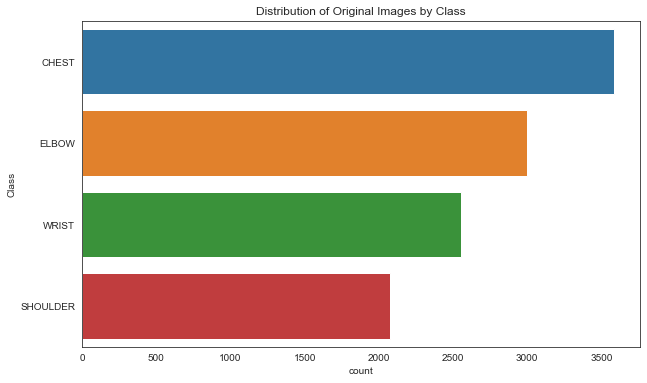

In [5]:
counter = Counter(targetnames)
for k,v in counter.items():
    dist = v/len(targetnames) * 100
    print(f"Class = {k}, number of samples={v}")
    
print(f"Total images: {len(targetnames)} ")

targetname = np.array(targetnames) 
df = pd.DataFrame(targetname)
df['Class'] = pd.DataFrame(targetname)
sns.set_style("white", {'axes.grid' : False})
plt.figure(figsize=(10,6))
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Distribution of Original Images by Class')
sns.countplot(y = 'Class', data = df, order = df['Class'].value_counts().index)
plt.show()

## Data Visualisation

The following cells show 12 samples each for each class of the dataset:

Chest Sample Images: 


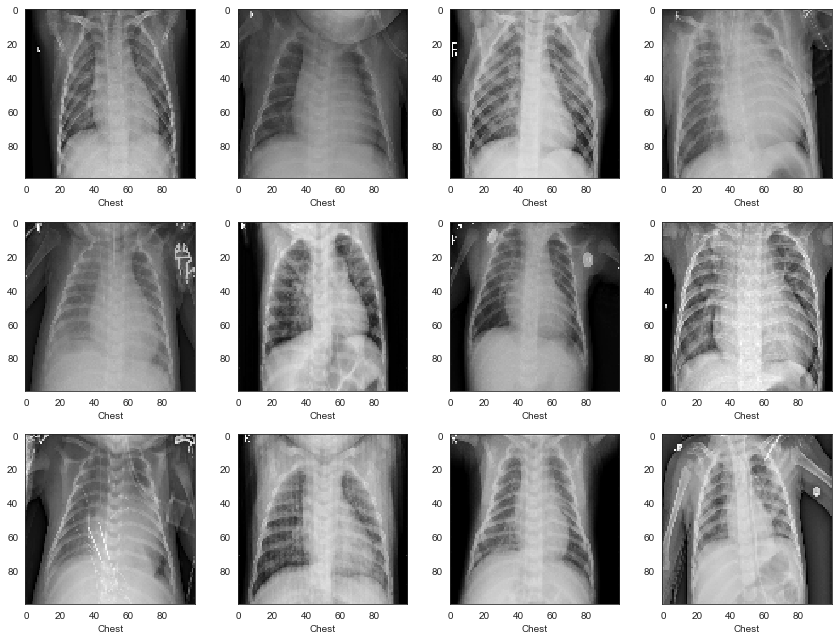

In [6]:
chestrepo = primaryrepo[np.asarray(targetnames) == 'CHEST']
plt.figure(figsize=(12,9))
chest_img = np.random.choice(len(chestrepo), 12)
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.xlabel("Chest")
    plt.tight_layout()
    plt.imshow(np.asarray(chestrepo[chest_img[i]]).reshape(100,100), 
                   cmap='gray', interpolation='nearest')
print("Chest Sample Images: ")
plt.show()



Elbow Sample Images: 


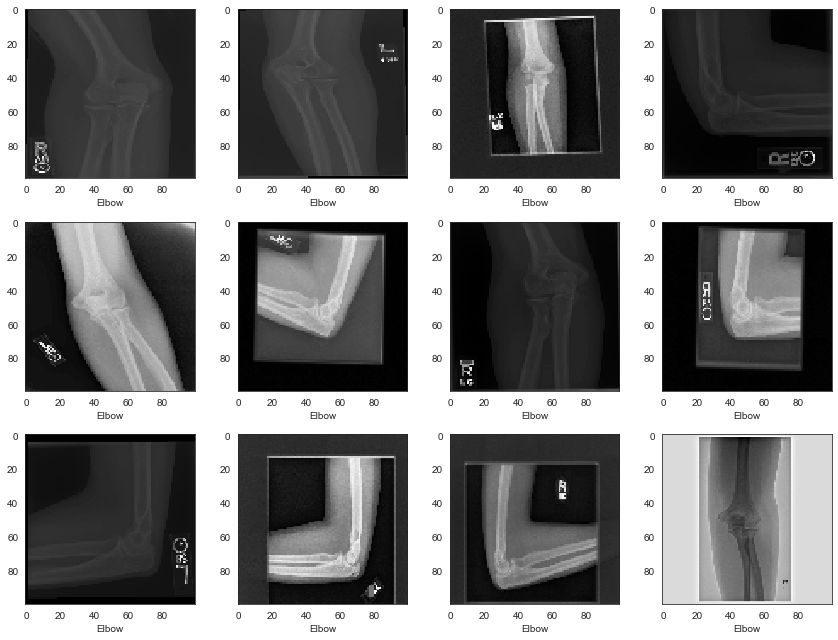

In [7]:
elbowrepo = primaryrepo[np.asarray(targetnames) == 'ELBOW']
plt.figure(figsize=(12,9))
elbow_img = np.random.choice(len(elbowrepo), 12)
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.xlabel("Elbow")
    plt.tight_layout()
    plt.imshow(np.asarray(elbowrepo[elbow_img[i]]).reshape(100,100), 
                   cmap='gray', interpolation='nearest')
print("Elbow Sample Images: ")
plt.show()

Shoulder Sample Images: 


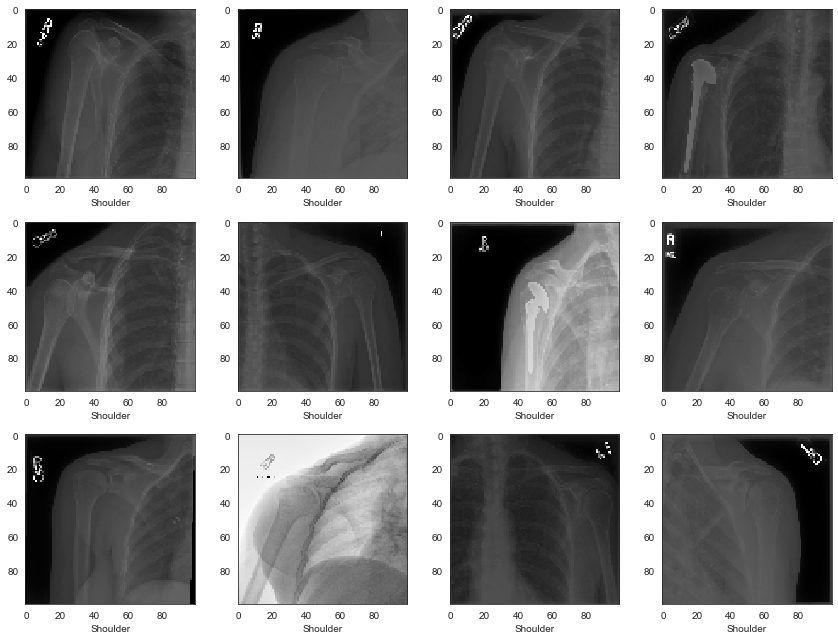

In [8]:
shoulderrepo = primaryrepo[np.asarray(targetnames) == 'SHOULDER']
plt.figure(figsize=(12,9))
shoulder_img = np.random.choice(len(shoulderrepo), 12)
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.xlabel("Shoulder")
    plt.tight_layout()
    plt.imshow(np.asarray(shoulderrepo[shoulder_img[i]]).reshape(100,100), 
                   cmap='gray', interpolation='nearest')
print("Shoulder Sample Images: ")
plt.show()

Wrist Sample Images: 


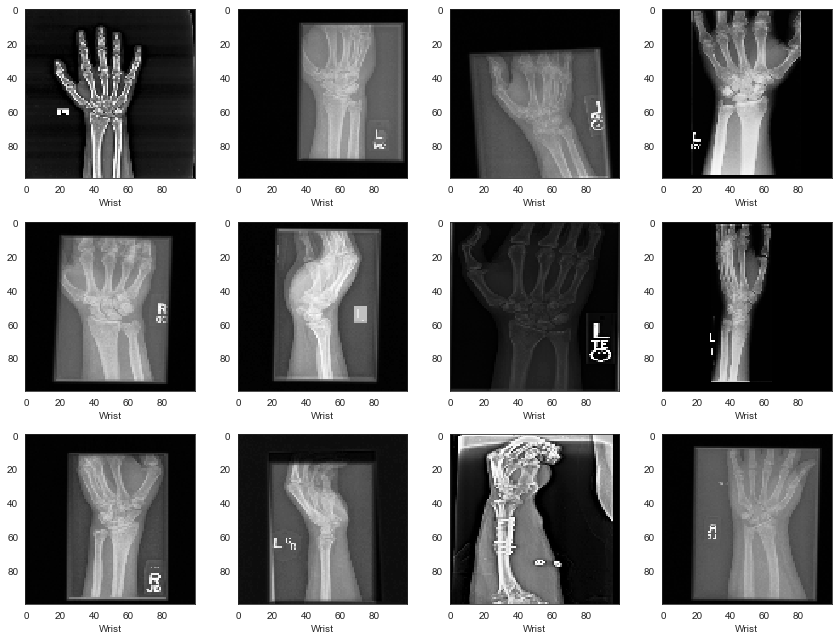

In [9]:
wristrepo = primaryrepo[np.asarray(targetnames) == 'WRIST']
plt.figure(figsize=(12,9))
wrist_img = np.random.choice(len(wristrepo), 12)
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.xlabel("Wrist")
    plt.tight_layout()
    plt.imshow(np.asarray(wristrepo[wrist_img[i]]).reshape(100,100), 
                   cmap='Greys_r', interpolation='nearest')
print("Wrist Sample Images: ")
plt.show()

# Part 2 -  Validation (Experiments)

## Data Split

A stratified data split is applied to the whole dataset such that 70% is used for training and 30% for testing. This is done for the original dataset as well as  the features-extracted dataset.

Also, a new variable `target` is created below to provide numerical labels for the `targetnames` variable using list comprehension methods.

In [10]:
target = []
target = [0 if a == 'CHEST' else 1 if a == 'ELBOW'else 2 if a == 'SHOULDER' else 3 for a in targetnames]
target=np.array(target)
print(target, type(target),target.shape)

[0 0 0 ... 3 3 3] <class 'numpy.ndarray'> (11210,)


In [11]:
primaryrepo_train, primaryrepo_test, primaryrepotarget_train, primaryrepotarget_test = train_test_split(primaryrepo,target,stratify=target,test_size=0.3, random_state=42)
print('Number of chest, elbow, shoulder and wrist samples in the training set: ', np.count_nonzero(primaryrepotarget_train == 0),np.count_nonzero(primaryrepotarget_train == 1),np.count_nonzero(primaryrepotarget_train == 2),np.count_nonzero(primaryrepotarget_train == 3))
print('Number of chest, elbow, shoulder and wrist samples in the test set: ',np.count_nonzero(primaryrepotarget_test == 0),np.count_nonzero(primaryrepotarget_test == 1),np.count_nonzero(primaryrepotarget_test == 2),np.count_nonzero(primaryrepotarget_test == 3))

Number of chest, elbow, shoulder and wrist samples in the training set:  2508 2100 1451 1788
Number of chest, elbow, shoulder and wrist samples in the test set:  1075 900 622 766


In [12]:
featurerepo_train, featurerepo_test, featurerepotarget_train, featurerepotarget_test = train_test_split(featurerepo,target,stratify=target,test_size=0.3, random_state=42)
print('Number of chest, elbow, shoulder and wrist samples in the features training set: ',np.count_nonzero(featurerepotarget_train == 0),np.count_nonzero(featurerepotarget_train == 1),np.count_nonzero(featurerepotarget_train == 2),np.count_nonzero(featurerepotarget_train == 3))
print('Number of chest, elbow, shoulder and wrist samples in the features test set: ',np.count_nonzero(featurerepotarget_test == 0),np.count_nonzero(featurerepotarget_test == 1),np.count_nonzero(featurerepotarget_test == 2),np.count_nonzero(featurerepotarget_test == 3))

Number of chest, elbow, shoulder and wrist samples in the features training set:  2508 2100 1451 1788
Number of chest, elbow, shoulder and wrist samples in the features test set:  1075 900 622 766


In [13]:
print("The training datasets have " + str(primaryrepo_train.shape[0]) + " samples while the testing datasets have " + str(primaryrepo_test.shape[0]) + " samples each.")


The training datasets have 7847 samples while the testing datasets have 3363 samples each.


Showing the class distribution for both the training and test datasets:

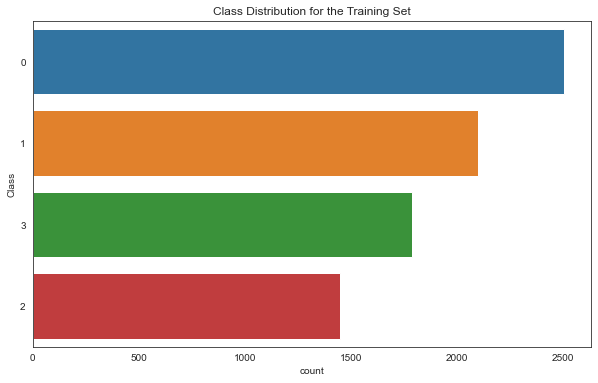

In [14]:
df1 = pd.DataFrame(primaryrepotarget_train)
df1['Class'] = pd.DataFrame(primaryrepotarget_train)
sns.set_style("white", {'axes.grid' : False})
plt.figure(figsize=(10,6))
plt.xlabel('Class')
plt.title('Class Distribution for the Training Set')
sns.countplot(y = 'Class', data = df1, order = df1['Class'].value_counts().index)
plt.show()

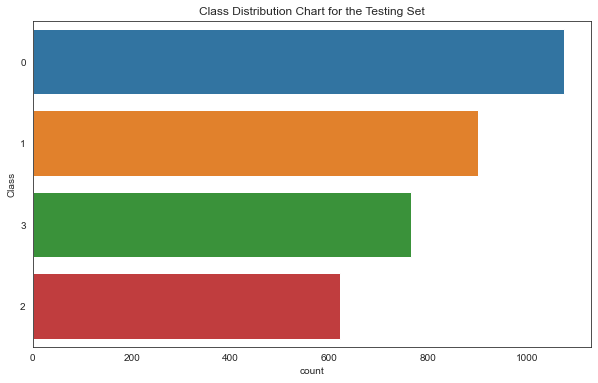

In [15]:
df2 = pd.DataFrame(primaryrepotarget_test)
df2['Class'] = pd.DataFrame(primaryrepotarget_test)
sns.set_style("white", {'axes.grid' : False})
plt.figure(figsize=(10,6))
plt.xlabel('Class')
plt.title('Class Distribution Chart for the Testing Set')
sns.countplot(y = 'Class', data = df2, order = df2['Class'].value_counts().index)
plt.show()

## Experiment A - Image Classification using Convolutional Neural Network (CNN)

With the training and testing dataset obtained above, and using `Keras` with a `Tensorflow` backend, CNN is employed for multiclass classification of the *primaryrepo* image repository in its unaltered state.

Loading required libraries:

In [16]:
os.environ['KERAS_BACKEND'] = 'tensorflow'
from keras.utils import np_utils

### Preprocessing Input  Data and Class Labels

The code below reshapes the training and test input data into four dimensions, converts the resulting data to a *float32* datatype and normalises the data:


In [17]:
primaryrepo_train_reshape = primaryrepo_train.reshape(primaryrepo_train.shape[0], 100, 100, 1)
primaryrepo_test_reshape = primaryrepo_test.reshape(primaryrepo_test.shape[0], 100, 100, 1)
# Convert to float 32
primaryrepo_train_reshape = primaryrepo_train_reshape.astype('float32')
primaryrepo_test_reshape = primaryrepo_test_reshape.astype('float32')
# normalise
primaryrepo_train_reshape /= 255 
primaryrepo_test_reshape /= 255

In [18]:
print(primaryrepo_train_reshape.shape)
print(primaryrepo_test_reshape.shape)


(7847, 100, 100, 1)
(3363, 100, 100, 1)


Also, the targets are transformed so its values are categorical and represented as a vector:

In [19]:
target_train_categorical = np_utils.to_categorical(primaryrepotarget_train, 4)
target_test_categorical = np_utils.to_categorical(primaryrepotarget_test, 4)

print(target_train_categorical[5900])
print(primaryrepotarget_train[5900])

[0. 0. 1. 0.]
2


### CNN Model Architecture

The sequential CNN is defined with two convolutional layers, a max pooling of size  2×2  and a dropout of  0.25. A flattened layer is added, closely followed by a densely connected layer with a ReLu activation and another dropout of  0.5. Finally, another densely connected layer is added to the output with a softmax activation function. 

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

model = Sequential()
 
model.add(Conv2D(32, (3, 3), padding ='same', activation='relu', input_shape= primaryrepo_train_reshape.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [21]:
print("Model Summary is given below:")
model.summary()

Model Summary is given below:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 98, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 49, 32)        0         
                                                                 
 flatten (Flatten)           (None, 76832)             0         
                                                                 
 dense (Dense)               (None, 128)               9834624   
                          

### Training the Model

The model is compiled and fitted to the training data:

In [22]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [23]:
model.fit(primaryrepo_train_reshape, target_train_categorical, 
          batch_size=32, epochs=12, verbose=1) 

Epoch 1/12
246/246 [==============================] - 89s 346ms/step - loss: 0.4855 - accuracy: 0.8116
Epoch 2/12
246/246 [==============================] - 88s 357ms/step - loss: 0.2637 - accuracy: 0.9044
Epoch 3/12
246/246 [==============================] - 91s 368ms/step - loss: 0.1943 - accuracy: 0.9253
Epoch 4/12
246/246 [==============================] - 87s 352ms/step - loss: 0.1601 - accuracy: 0.9400
Epoch 5/12
246/246 [==============================] - 86s 350ms/step - loss: 0.1174 - accuracy: 0.9562
Epoch 6/12
246/246 [==============================] - 86s 351ms/step - loss: 0.0997 - accuracy: 0.9629
Epoch 7/12
246/246 [==============================] - 88s 356ms/step - loss: 0.0949 - accuracy: 0.9660
Epoch 8/12
246/246 [==============================] - 87s 355ms/step - loss: 0.0705 - accuracy: 0.9763
Epoch 9/12
246/246 [==============================] - 89s 360ms/step - loss: 0.0585 - accuracy: 0.9787
Epoch 10/12
246/246 [==============================] - 89s 364ms/step - l

### Performance Evaluation of the CNN Model

The fitted model is now evaluated on the test set:

In [24]:
loss, accuracy = model.evaluate(primaryrepo_test_reshape, target_test_categorical, verbose=0, batch_size=32)
print('Loss: ', loss,'\nAcc: ', accuracy)

Loss:  0.20201291143894196 
Acc:  0.955694317817688


In [25]:
predict_x=model.predict(primaryrepo_test_reshape) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

[3 0 1 ... 1 3 0]


The following codes will help check the labels that have been predicted incorrectly:

In [26]:
numpytarget = np.array(targetnames)
unique = np.unique(numpytarget)
target2 = {unique[i]: i for i in range(len(unique))}
target2

{'CHEST': 0, 'ELBOW': 1, 'SHOULDER': 2, 'WRIST': 3}

In [27]:
incorrect_labels=[]
accuracy = 0
for i,cla in enumerate(classes_x):
  if cla != primaryrepotarget_test[i]:
    print("Sample "+str(i)+" was classified as "+ unique[cla]+" instead of "+ unique[(primaryrepotarget_test[i])])

Sample 10 was classified as WRIST instead of ELBOW
Sample 24 was classified as WRIST instead of ELBOW
Sample 45 was classified as WRIST instead of ELBOW
Sample 50 was classified as WRIST instead of ELBOW
Sample 76 was classified as WRIST instead of ELBOW
Sample 134 was classified as WRIST instead of ELBOW
Sample 190 was classified as WRIST instead of ELBOW
Sample 195 was classified as ELBOW instead of SHOULDER
Sample 203 was classified as ELBOW instead of WRIST
Sample 237 was classified as ELBOW instead of WRIST
Sample 239 was classified as WRIST instead of ELBOW
Sample 272 was classified as SHOULDER instead of WRIST
Sample 305 was classified as ELBOW instead of SHOULDER
Sample 316 was classified as ELBOW instead of WRIST
Sample 347 was classified as WRIST instead of ELBOW
Sample 373 was classified as ELBOW instead of WRIST
Sample 389 was classified as SHOULDER instead of WRIST
Sample 420 was classified as ELBOW instead of WRIST
Sample 449 was classified as WRIST instead of ELBOW
Sampl

The code below helps to visualise samples from the train and test cells along with their predicted and ground truth label:

Ground truth label:  ELBOW
Predicted label:  ELBOW


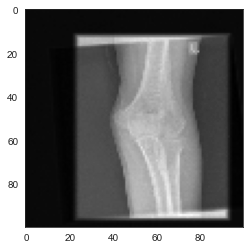

In [28]:
image_to_show = 3352
from_group = 'test' 
if from_group == 'train':
    plt.imshow(primaryrepo_train_reshape[image_to_show], cmap ='gray')
    print('Ground truth label: ',unique[primaryrepotarget_train[image_to_show]])
else:
    plt.imshow(primaryrepo_test_reshape[image_to_show], cmap ='gray')
    print('Ground truth label: ',unique[primaryrepotarget_test[image_to_show]])
    if len(predict_x)>image_to_show:
        print('Predicted label: ',unique[classes_x[image_to_show]])

The precision, recall and f1-scores for the CNN model are given below. A confusion matrix is also plotted:

In [29]:
from sklearn import metrics
class_names = ['chest', 'elbow', 'shoulder','wrist']

In [30]:
print('Accuracy of CNN: ', metrics.accuracy_score(primaryrepotarget_test, classes_x))
print('Precision for CNN: ',metrics.precision_score(primaryrepotarget_test, classes_x, average='weighted'))
print('Recall for CNN: ',metrics.recall_score(primaryrepotarget_test, classes_x, average='weighted'))
print('F1-score for CNN: ',metrics.f1_score(primaryrepotarget_test, classes_x, average='weighted'))

Accuracy of CNN:  0.9556943205471305
Precision for CNN:  0.9557501980284958
Recall for CNN:  0.9556943205471305
F1-score for CNN:  0.9556905035693305


In [31]:
table = metrics.classification_report(primaryrepotarget_test, classes_x, target_names=class_names, digits=3)
print(table)

              precision    recall  f1-score   support

       chest      0.997     0.999     0.998      1075
       elbow      0.935     0.921     0.928       900
    shoulder      0.961     0.957     0.959       622
       wrist      0.918     0.935     0.926       766

    accuracy                          0.956      3363
   macro avg      0.953     0.953     0.953      3363
weighted avg      0.956     0.956     0.956      3363



[[1074    0    0    1]
 [   2  829   10   59]
 [   0   23  595    4]
 [   1   35   14  716]]


Text(70.0, 0.5, 'Actual')

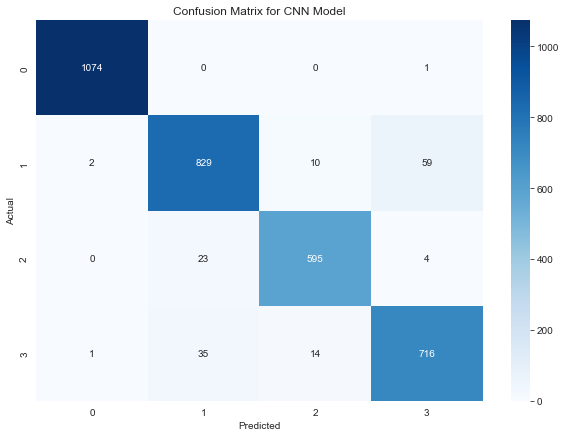

In [32]:
matrix = metrics.confusion_matrix(primaryrepotarget_test, classes_x)
print(matrix)

plt.figure(figsize=(10,7))
sns.heatmap(matrix, annot = True, fmt = "d", cmap = 'Blues')
plt.title("Confusion Matrix for CNN Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")

## Experiment B -  Image Classification with a CNN Model after Applying Image Augmentation to the Train Set 

In this experiment, the images for the various classes in the training set have been augmented using `Keras` and a CNN model is fitted with this augmented data. Image classification is then executed as before.

### Image Augmentation

The ImageDataGenerator function in `keras` is used to augment and balance the training data:


In [33]:
from keras.preprocessing.image import ImageDataGenerator
data_gen = ImageDataGenerator(
        rotation_range=45,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [34]:
primaryrepotrain1 = primaryrepo_train.reshape(primaryrepo_train.shape[0], 100, 100, 1)
i = 0
for batch in data_gen.flow(primaryrepotrain1[np.asarray(primaryrepotarget_train) == 0], batch_size = 2, save_to_dir = "CHEST", save_prefix = 'aug', save_format = 'png'):
    i += 1
    if i > 1253:
        break
j = 0
for batch in data_gen.flow(primaryrepotrain1[np.asarray(primaryrepotarget_train) == 1], batch_size = 2, save_to_dir = "ELBOW", save_prefix = 'aug', save_format = 'png'):
    j += 1
    if j > 1253:
        break  
k = 0
for batch in data_gen.flow(primaryrepotrain1[np.asarray(primaryrepotarget_train) == 2], batch_size = 2, save_to_dir = "SHOULDER", save_prefix = 'aug', save_format = 'png'):
    k += 1
    if k > 1254:
        break 
l = 0
for batch in data_gen.flow(primaryrepotrain1[np.asarray(primaryrepotarget_train) == 3], batch_size = 2, save_to_dir = "WRIST", save_prefix = 'aug', save_format = 'png'):
    l += 1
    if l > 1253:
        break        

Importing the augmented images:

In [35]:
size = 100
path = 'Augmented'
image = [] 
target_aug = [] 
augmentedtraining = []

for root, dirs, files in os.walk(path):
     for file in files:
        with open(os.path.join(root, file), "r") as auto:
            try:
                img = cv2.imread(root+'/'+file, 0)
                img = cv2.resize(img, (size, size)) 
                image.append(img)
                augmentedtraining.append(img.flatten())
                target_aug.append(root.replace(path,'').replace('\\','').replace('/',''))
            except Exception as e:
                print("Cannot import "+file)

augmentedtraining = np.array(augmentedtraining)

In [36]:
print("Augmented Data:\n", augmentedtraining)
print("Size of augmented data: ", augmentedtraining.shape)

Augmented Data:
 [[ 19  29  38 ...   0   0   0]
 [ 72 107 100 ...   8   0   0]
 [133 112  81 ...  38  37  37]
 ...
 [146 133 114 ... 216 225 223]
 [146 133 114 ... 216 225 223]
 [159 143 122 ... 136   0   0]]
Size of augmented data:  (10032, 10000)


Class = CHEST, n=2508 (25.0%)
Class = ELBOW, n=2508 (25.0%)
Class = SHOULDER, n=2508 (25.0%)
Class = WRIST, n=2508 (25.0%)
Total images: 10032 


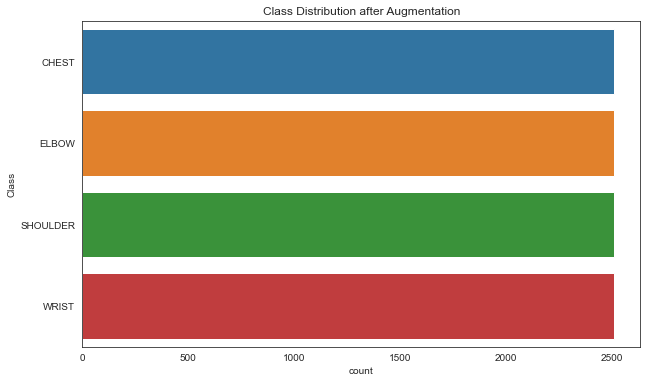

In [37]:
counter1 = Counter(target_aug)
for k1,v1 in counter1.items():
    dist1 = v1/len(target_aug) * 100
    print(f"Class = {k1}, n={v1} ({dist1}%)")
    
print(f"Total images: {len(target_aug)} ")

target_aug = np.array(target_aug) 
df3= pd.DataFrame(target_aug)
df3['Class'] = pd.DataFrame(target_aug)
sns.set_style("white", {'axes.grid' : False})
plt.figure(figsize=(10,6))
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution after Augmentation')
sns.countplot(y = 'Class', data = df3, order = df3['Class'].value_counts().index)
plt.show()

The targets in `target_aug` are also provided numerical variables as before: 

In [38]:
targetaug = []
targetaug = [0 if a == 'CHEST' else 1 if a == 'ELBOW'else 2 if a == 'SHOULDER' else 3 for a in target_aug]
targetaug=np.array(targetaug)
print(targetaug, type(targetaug),targetaug.shape)

[0 0 0 ... 3 3 3] <class 'numpy.ndarray'> (10032,)


The CNN model is now created and fitted on the augmented data:

### Preprocessing Input  Data and Class Labels


In [39]:
augmentedtraining_reshape = augmentedtraining.reshape(augmentedtraining.shape[0], 100, 100, 1)

# Convert to float 32
augmentedtraining_reshape = augmentedtraining_reshape.astype('float32')

# normalise
augmentedtraining_reshape /= 255 

In [40]:
print(augmentedtraining_reshape.shape)
print(primaryrepo_test_reshape.shape)

(10032, 100, 100, 1)
(3363, 100, 100, 1)


In [41]:
target_train_categorical1 = np_utils.to_categorical(targetaug, 4)

print(target_train_categorical1[5900])
print(targetaug[5900])

[0. 0. 1. 0.]
2


### CNN Model2 Architecture

In [42]:
model1 = Sequential()
 
model1.add(Conv2D(32, (3, 3), padding ='same', activation='relu', input_shape= primaryrepo_train_reshape.shape[1:]))
model1.add(Conv2D(32, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.25))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(4, activation='softmax'))

In [43]:
print("Model1 Summary is given below:")
model1.summary()

Model1 Summary is given below:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 100, 100, 32)      320       
                                                                 
 conv2d_3 (Conv2D)           (None, 98, 98, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 49, 49, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 76832)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               9834624   
                       

### Training the Model

In [44]:
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [46]:
model1.fit(augmentedtraining_reshape, target_train_categorical1, 
          batch_size=32, epochs=12, verbose=1)

Epoch 1/12
314/314 [==============================] - 120s 372ms/step - loss: 0.4361 - accuracy: 0.8379
Epoch 2/12
314/314 [==============================] - 117s 374ms/step - loss: 0.2043 - accuracy: 0.9270
Epoch 3/12
314/314 [==============================] - 117s 372ms/step - loss: 0.1263 - accuracy: 0.9547
Epoch 4/12
314/314 [==============================] - 114s 362ms/step - loss: 0.0825 - accuracy: 0.9717
Epoch 5/12
314/314 [==============================] - 111s 353ms/step - loss: 0.0628 - accuracy: 0.9799
Epoch 6/12
314/314 [==============================] - 109s 349ms/step - loss: 0.0568 - accuracy: 0.9817
Epoch 7/12
314/314 [==============================] - 111s 353ms/step - loss: 0.0421 - accuracy: 0.9845
Epoch 8/12
314/314 [==============================] - 110s 349ms/step - loss: 0.0406 - accuracy: 0.9851
Epoch 9/12
314/314 [==============================] - 110s 350ms/step - loss: 0.0338 - accuracy: 0.9876
Epoch 10/12
314/314 [==============================] - 111s 355m

### Performance Evaluation of the CNN Model

In [47]:
loss, accuracy = model1.evaluate(primaryrepo_test_reshape, target_test_categorical, verbose=0, batch_size=32)
print('Loss: ', loss,'\nAcc: ', accuracy)

Loss:  0.1637198030948639 
Acc:  0.9580731391906738


In [48]:
predict_x1=model1.predict(primaryrepo_test_reshape) 
classes_x1=np.argmax(predict_x1,axis=1)
print(classes_x1)

[3 0 1 ... 1 3 0]


Similarly, the precision, recall and f1-scores for CNN model2 are given below. Its confusion matrix is also plotted:

In [49]:
print('Accuracy of CNN2: ', metrics.accuracy_score(primaryrepotarget_test, classes_x1))
print('Precision for CNN2: ',metrics.precision_score(primaryrepotarget_test, classes_x1, average='weighted'))
print('Recall for CNN2: ',metrics.recall_score(primaryrepotarget_test, classes_x1, average='weighted'))
print('F1-score for CNN2: ',metrics.f1_score(primaryrepotarget_test, classes_x1, average='weighted'))

Accuracy of CNN2:  0.9580731489741302
Precision for CNN2:  0.9582460520128369
Recall for CNN2:  0.9580731489741302
F1-score for CNN2:  0.9580406049125535


In [50]:
table1 = metrics.classification_report(primaryrepotarget_test, classes_x1, target_names=class_names, digits=3)
print(table1)

              precision    recall  f1-score   support

       chest      0.996     0.998     0.997      1075
       elbow      0.919     0.946     0.932       900
    shoulder      0.966     0.965     0.965       622
       wrist      0.945     0.911     0.928       766

    accuracy                          0.958      3363
   macro avg      0.956     0.955     0.956      3363
weighted avg      0.958     0.958     0.958      3363



[[1073    2    0    0]
 [   2  851   11   36]
 [   0   17  600    5]
 [   2   56   10  698]]


Text(70.0, 0.5, 'Actual')

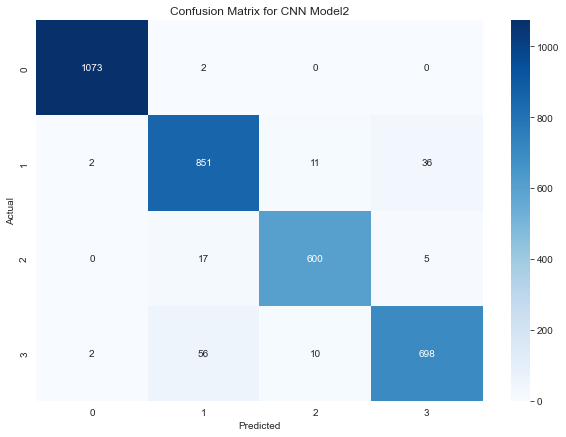

In [51]:
matrix1 = metrics.confusion_matrix(primaryrepotarget_test, classes_x1)
print(matrix1)

plt.figure(figsize=(10,7))
sns.heatmap(matrix1, annot = True, fmt = "d", cmap = 'Blues')
plt.title("Confusion Matrix for CNN Model2")
plt.xlabel("Predicted")
plt.ylabel("Actual")

## Experiment C -  Image Classification using Random Forest after Features Extraction of the Starting Dataset

In this experiment, Random Forest is the ML algorithm used to classify the features previously extracted from the image repository. Random Forest is used because decision-tree based models have been known to work well with imbalanced datasets. Recall that the features have been split already in a stratified manner. The resulting training set is used to fit the RF model while the test set is used for classification and predictions.


In [52]:
from sklearn.ensemble import RandomForestClassifier
rf_model1 = RandomForestClassifier(n_estimators = 1000, random_state = 42)
clf_rf = rf_model1.fit(featurerepo_train, featurerepotarget_train)
target_rf1 = rf_model1.predict(featurerepo_test)
print(target_rf1,target_rf1.shape)

[3 0 1 ... 1 3 0] (3363,)


### Performance Metrics for the RF Model

The precision, recall and f1-scores for the RF model are calculated and the confusion matrix is plotted:

In [53]:
print('Accuracy of RF1: ', metrics.accuracy_score(featurerepotarget_test,target_rf1))
print('Precision for RF1: ',metrics.precision_score(featurerepotarget_test,target_rf1, average='weighted'))
print('Recall for RF1: ',metrics.recall_score(featurerepotarget_test,target_rf1, average='weighted'))
print('F1-score for RF1: ',metrics.f1_score(featurerepotarget_test,target_rf1, average='weighted'))

Accuracy of RF1:  0.9598572702943801
Precision for RF1:  0.9601985838277111
Recall for RF1:  0.9598572702943801
F1-score for RF1:  0.9599309156852466


In [54]:
table2 = metrics.classification_report(featurerepotarget_test, target_rf1, target_names=class_names, digits=3)
print(table2)

              precision    recall  f1-score   support

       chest      0.996     0.999     0.998      1075
       elbow      0.938     0.926     0.932       900
    shoulder      0.985     0.960     0.972       622
       wrist      0.915     0.945     0.930       766

    accuracy                          0.960      3363
   macro avg      0.959     0.957     0.958      3363
weighted avg      0.960     0.960     0.960      3363



[[1074    0    1    0]
 [   0  833    4   63]
 [   1   20  597    4]
 [   3   35    4  724]]


Text(70.0, 0.5, 'Actual')

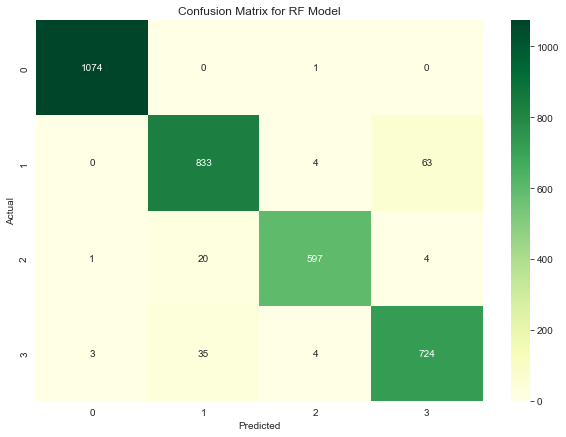

In [55]:
matrix2 = metrics.confusion_matrix(featurerepotarget_test, target_rf1)
print(matrix2)

plt.figure(figsize=(10,7))
sns.heatmap(matrix2, annot = True, fmt = "d", cmap = 'YlGn')
plt.title("Confusion Matrix for RF Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")

### Cross Validation

To ensure that the results obtained with the RF model is not too optimistic given that the data was split once, cross validation is employed to obtain precision, recall and f1-scores again. This is achieved using cv=5:

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

scores_rf = cross_validate(rf_model1, featurerepo, target, cv=5)
print('RF cross-validated scores: ', scores_rf)

RF cross-validated scores:  {'fit_time': array([255.0800662 , 266.23686266, 582.07296038, 299.69968796,
       274.16466188]), 'score_time': array([0.69183779, 0.82016015, 0.71834731, 0.87198234, 0.74853849]), 'test_score': array([0.95450491, 0.95182872, 0.96743979, 0.96565566, 0.95405888])}


In [57]:
print('Accuracy for RF: ',cross_val_score(rf_model1, featurerepo, target, cv=5, scoring = 'accuracy'))

print('Mean Accuracy for RF: ',np.mean(cross_val_score(rf_model1, featurerepo, target, cv=5, scoring = 'accuracy')))

Accuracy for RF:  [0.95450491 0.95182872 0.96743979 0.96565566 0.95405888]
Mean Accuracy for RF:  0.9586975914362178


In [58]:
print('Precision for RF: ',cross_val_score(rf_model1, featurerepo, target, cv=5, scoring = 'precision_weighted'))
print('Recall for RF: ',cross_val_score(rf_model1, featurerepo, target, cv=5, scoring = 'recall_weighted'))
print('F1-Score for RF: ',cross_val_score(rf_model1, featurerepo, target, cv=5, scoring = 'f1_weighted'))


print('Mean Precision for RF: ',np.mean(cross_val_score(rf_model1, featurerepo, target, cv=5, scoring = 'precision_weighted')))

print('Mean Recall for RF: ',np.mean(cross_val_score(rf_model1, featurerepo, target, cv=5, scoring = 'recall_weighted')))

print('Mean F1-Score for RF: ',np.mean(cross_val_score(rf_model1, featurerepo, target, cv=5, scoring = 'f1_weighted')))

Precision for RF:  [0.95412972 0.95182172 0.9681293  0.96570755 0.95481537]
Recall for RF:  [0.95450491 0.95182872 0.96743979 0.96565566 0.95405888]
F1-Score for RF:  [0.95425234 0.95181092 0.96748767 0.96567438 0.95425224]
Mean Precision for RF:  0.9589207327250667
Mean Recall for RF:  0.9586975914362178
Mean F1-Score for RF:  0.958695508010905


## Experiment D -  Image Classification with Random Forest after Balance of the Train Set using SMOTE

To reduce bias of the RF model to the majority class, the Synthetic Minority Oversampling Technique (SMOTE) is applied to the features training data using the inbuilt SMOTE function in `imblearn`

In [59]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=42)
hogrepo_smote, target_smote = oversample.fit_resample(featurerepo_train,featurerepotarget_train)

In [60]:
print("Size of SMOTE augmented target: " ,len(target_smote))
print("Size of SMOTE augmented repository: " ,hogrepo_smote.shape)
print("Example of the SMOTE augmented Repository:\n", hogrepo_smote)

Size of SMOTE augmented target:  10032
Size of SMOTE augmented repository:  (10032, 1800)
Example of the SMOTE augmented Repository:
 [[0.4117989  0.13049469 0.15089384 ... 0.07101696 0.07720475 0.39313669]
 [0.54705444 0.14323533 0.13178165 ... 0.21043937 0.32039147 0.        ]
 [0.         0.00533283 0.         ... 0.07907385 0.06025421 0.15198277]
 ...
 [0.15841614 0.         0.02280546 ... 0.02409377 0.         0.30907058]
 [0.72561338 0.16143436 0.26542892 ... 0.01898101 0.00700038 0.64790582]
 [0.35666306 0.         0.13118721 ... 0.         0.         0.        ]]


Class = 0, n=2508 (25.0%)
Class = 2, n=2508 (25.0%)
Class = 3, n=2508 (25.0%)
Class = 1, n=2508 (25.0%)
Total images: 10032 


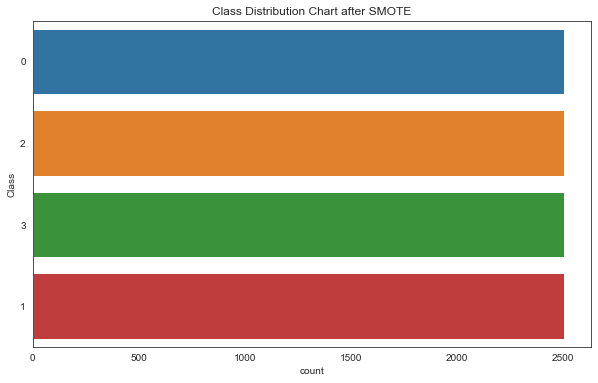

In [61]:
counter2 = Counter(target_smote)
for k,v in counter2.items():
    dist = v/len(target_smote) * 100
    print(f"Class = {k}, n={v} ({dist}%)")
    
print(f"Total images: {len(target_smote)} ")    

df4 = pd.DataFrame(target_smote)
df4['Class'] = pd.DataFrame(target_smote)
sns.set_style("white", {'axes.grid' : False})
plt.figure(figsize=(10,6))
plt.xlabel('Class')
plt.title('Class Distribution Chart after SMOTE')
sns.countplot(y = 'Class', data = df4, order = df4['Class'].value_counts().index)
plt.show()

As in Experiment C, the SMOTE oversampled data is used to fit a RF model while the unaltered test set is used for the image classification. 

In [62]:
rf_model2 = RandomForestClassifier(n_estimators = 1000, random_state = 42)
clf_rf2 = rf_model2.fit(hogrepo_smote, target_smote)
target_rf2 = rf_model2.predict(featurerepo_test)
print(target_rf2,target_rf2.shape)

[3 0 1 ... 1 3 0] (3363,)


### Performance Metrics for RF Model 2

Finally, the precision, recall and f1-scores for RF_model2 are calculated and the confusion matrix is plotted:

In [63]:
print('Accuracy of RF2: ', metrics.accuracy_score(featurerepotarget_test,target_rf2))
print('Precision for RF2: ',metrics.precision_score(featurerepotarget_test,target_rf2, average='weighted'))
print('Recall for RF2: ',metrics.recall_score(featurerepotarget_test,target_rf2, average='weighted'))
print('F1-score for RF2: ',metrics.f1_score(featurerepotarget_test,target_rf2, average='weighted'))

Accuracy of RF2:  0.9616413916146298
Precision for RF2:  0.9618801195700232
Recall for RF2:  0.9616413916146298
F1-score for RF2:  0.9616742135971698


In [64]:
table3 =metrics.classification_report(featurerepotarget_test, target_rf2, target_names=class_names, digits=3)
print(table3)

              precision    recall  f1-score   support

       chest      0.997     0.999     0.998      1075
       elbow      0.945     0.924     0.935       900
    shoulder      0.981     0.971     0.976       622
       wrist      0.916     0.945     0.931       766

    accuracy                          0.962      3363
   macro avg      0.960     0.960     0.960      3363
weighted avg      0.962     0.962     0.962      3363



[[1074    0    1    0]
 [   0  832    5   63]
 [   1   14  604    3]
 [   2   34    6  724]]


Text(70.0, 0.5, 'Actual')

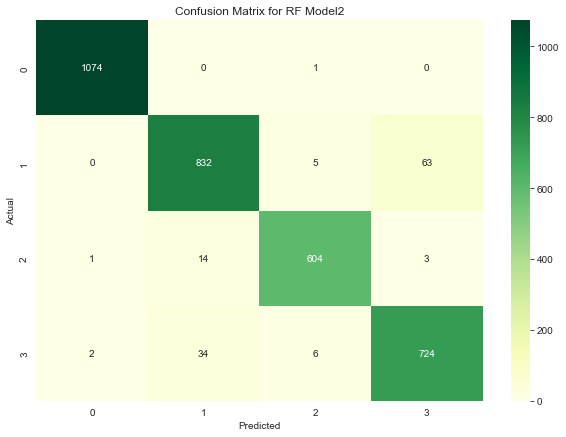

In [65]:
matrix3 = metrics.confusion_matrix(featurerepotarget_test, target_rf2)
print(matrix3)

plt.figure(figsize=(10,7))
sns.heatmap(matrix3, annot = True, fmt = "d", cmap = 'YlGn')
plt.title("Confusion Matrix for RF Model2")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Validation - Discussion of Results

The following two tables are created to visualize and analyse the precision, recall and f1-scores for each of the machine learning algorithms trained in the four experiments above:

In [68]:
from sklearn.metrics import classification_report
tab = pd.DataFrame(classification_report(primaryrepotarget_test, classes_x, target_names=class_names, output_dict=True))
tab1 = pd.DataFrame(classification_report(primaryrepotarget_test, classes_x1, target_names=class_names, output_dict=True))
frames = [tab,tab1]
results = pd.concat(frames, keys=["CNN Model1", "CNN Model2"])
results
results.style.set_caption('Table 1: Comparison of Results Obtained from CNN Model1 vs CNN Model2')

In [69]:
tab2 = pd.DataFrame(classification_report(featurerepotarget_test, target_rf1, target_names=class_names, output_dict=True))
tab3 = pd.DataFrame(classification_report(featurerepotarget_test, target_rf2, target_names=class_names, output_dict=True))
frames1 = [tab2,tab3]
results1 = pd.concat(frames1, keys=["RF Model1", "RF Model2"])
results1
results1.style.set_caption('Table 2: Comparison of Results Obtained from RF Model1 vs RF Model2')

## Experiment A and B 

Table 1 above compares the results obtained from experiment A and B using CNN to train a model for x-ray image classification. In the first instance (A), the imbalanced dataset was used to train the first model and in the second instance (B), the training data was balanced before fitting the CNN.

While the results show that the first model was better suited to classify correctly the chest class (majority class) given its higher precision,recall and f1-score, the second CNN model performed better in classifying the other classes having had a higher f1-score in these classes showing how good and complete the CNN model 2 is.
Generally, the weighted precision, recall and f1-scores were also slightly higher in CNN Model 2 when compared to its equivalent in CNN Model 1. The confusion matrices previously generated helps to visualise these analyses better.

In the course of running these experiments, it was noticed that the CNN models produced slightly different results every time it was run defeating the purpose of reproducibility. Also, epochs was initially set to 15, but after noticing that the loss was not decreasing further, it was reset to 12.



## Experiment C and D

Table 2 compares the results obtained from experiment C and D using Random Forest to train a model for x-ray image classification. The imbalanced dataset was used to train the first model (C) and in the second instance (B), the training data was balanced using SMOTE before fitting the RF model. In both cases, features extraction was applied to the starting dataset with the HOG method.

The results show that the first RF model had a slightly higher recall value for the elbow class as well as a slightly higher precision value for the shoulder class. Otherwise, the RF Model 2 outperformed RF Model 1 by every standard for all the classes present. The higher precision scores show that RF Model 2 was very good at predicting the true class over 90% of the time. Its higher recall scores is also indicative of how well it was able to correctly classify each class. The performances of these 2 models are visually represented by their confusion matrices previously obtained. 

Cross validation was also applied to RF Model 1 to ensure good results obtained was not just sheer luck. 
Given more time, class decomposition would have been the preferred method to handle imbalance in the dataset. 

In conclusion, the results from all the experiments show that it is better to deal with imbalance in a training dataset before fitting any machine learning model as this helps to reduce the bias of the model to the majority class.
The weighted average is preferred to other metrics for the multi-class classification, as it considers each class's support as weighted by the number of occurrence of that class.

# References

1. BROWNLEE,J.,2021. *SMOTE for Imbalanced Classification with Python*. [online]. Available from: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/ [ Accessed 21st April, 2022].


2. CHEN,B.,2021. *Image Classification using Convoluted Neural Networks (Keras) - Deep Learning Algorithm*. [online]. Available from: https://medium.com/@boyangchen02/vehicle-detection-using-convoluted-neural-networks-keras-7fca55f8eb9b/ [ Accessed 20th April, 2022].


3. Malik, H. *et al*.(2020), Wrist Fracture - X-rays,Version 1. Mendeley Data, V1. Retrieved February, 2022 from https://data.mendeley.com/datasets/xbdsnzr8ct/1 doi: 10.17632/xbdsnzr8ct.1


4. Mooney,P.(2018), Chest X-Ray Images (Pneumonia). Kaggle. Retrieved February, 2022 from https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

6. Suh,A.(2021), Finger X-ray. Kaggle. Retrieved February, 2022 from https://www.kaggle.com/datasets/alexandersuh/finger-xray 

